## Simulating Signals with NeuroDSP

* Simulate neuro-realistic aperiodic time series (dsp)
* Simulated neuro-realistic aperiodic time series (LFP; neurodsp) with known aperiodic parameters. 
* Simulate ECG.
* Z score both time series. 
* Multiply the entire ECG time series by 0.1 to make it smaller before adding it together.  

(Re do Richards paper - take realistic ratios of E/I aperiodic, 5:1 or 6:1 excitation and inhibition, simulate time series, alter the exponent, add ECG with diff params) 

Same neural signal with different ECG signal - i.e. HRV, wide or narrow R



### Load Data

In [1]:
import sys
sys.path.append('..')

from src.simulation import generate_ecg_cycle, generate_rhythmic_process, generate_rhythmic_signal, generate_poisson_process, generate_poisson_signal 

from src.gaussian_funcs import gaussian_function

ModuleNotFoundError: No module named 'src'

In [ ]:
# Import sim functions
from neurodsp.sim import (sim_powerlaw, sim_random_walk, sim_synaptic_current,
                          sim_knee, sim_frac_gaussian_noise, sim_frac_brownian_motion)
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.signal import detrend, butter, filtfilt, convolve, welch

from fooof import FOOOF
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model

In [2]:
%matplotlib inline

#######KEY ATTRIBUTES ##########
#FS = sampling rate; The sampling frequency of `ecg_signal` (in Hz, i.e., samples/second).
FS = 1000

### Parameters
CROP_MIN = 10000
CROP_MAX = 15000
WINDOW_LENGTH = 5000

#Simple Welch Input
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Set the time range (0 to ____ ms)
time_range = np.arange(0, 60000)
min_spike_interval = 800
xs = np.arange(0, 700)

# Set the random seed, for consistency simulating data
seed = 5

# Set the rate parameter (average events per unit time)
rate_parameter = 0.005  # Adjust this value as needed


#Gaussian Params 
gaussian_params = np.array([ 5.00000000e+01,  1.86660441e+03,  1.79841848e+01,  
                                 1.51461650e+02,  -8.16814518e+02,  7.71994180e+00,  
                                 1.85637028e+02,  3.18867419e+04, 1.13499461e+01,  
                                 2.15193654e+02, -5.20392350e+03,  6.11511696e+00,
                                 4.92442009e+02,  9.51070840e+03,  4.08261600e+01])


NameError: name 'np' is not defined

#### Saved code for plottin

In [4]:
# # Plot both signals together
# plt.figure(figsize=(11, 4))

# # Plot EEG signal with cardiac artifacts
# plt.plot(times, resulting_signal_rhythmic, color='#00a4b3', label='EEG Sig')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('EEG (Aperiodic) + Low HRV ECG', fontsize = 15)
# # plt.grid(True)
# plt.legend()

# # Plot cardiac artifact signal
# plt.plot(times, scaled_rhythmic_sig, color='orange', label='ECG Sig', lw = 3)

# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('EEG and Low HRV ECG', fontsize = 20)
# # plt.grid(True)
# plt.legend()

# # Insert vertical lines at each maximum point in the cardiac artifact signal
# for index in max_indices:
#     plt.axvline(x=times[index], color='black', linestyle='--')

# plt.tight_layout()  # Adjust layout to prevent overlap
#plt.show()


## Aperiodic EEG Signal

In [72]:
from scipy.signal import detrend

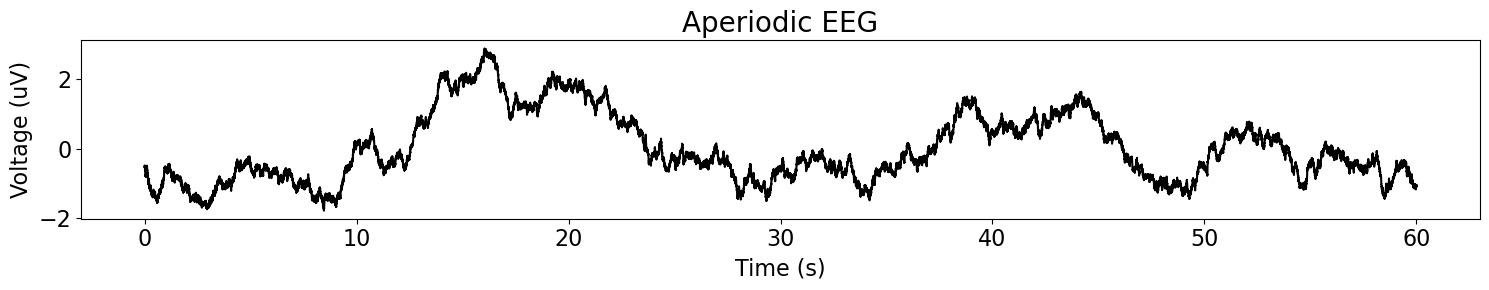

In [73]:
# Set the random seed, for consistency simulating data
set_random_seed(0)

# Set some general settings, to be used across all simulations
fs = 1000
n_seconds = 60

# Create a times vector for the simulations
times = create_times(n_seconds, fs)

# Set the exponent for brown noise, which is -2
exponent = -2

# Simulate powerlaw activity
br_noise = sim_powerlaw(n_seconds, fs, exponent)

# Plot the simulated data, in the time domain
plot_time_series(times, br_noise, title='Aperiodic EEG')

# Plot the simulated data, in the frequency domain
freqs, psd = compute_spectrum(br_noise, fs)
# plot_power_spectra(freqs, psd)

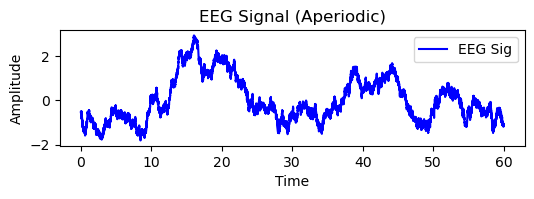

In [77]:
# Plot both signals together
plt.figure(figsize=(6, 1.5))

# Plot EEG signal with cardiac artifacts
plt.plot(times, br_noise, color='blue', label='EEG Sig')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal (Aperiodic)')
# plt.grid(True)
plt.legend()


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.95 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.5452, 2.1567                                          
                                                                                                  
                                       0 peaks were found:                                        
          

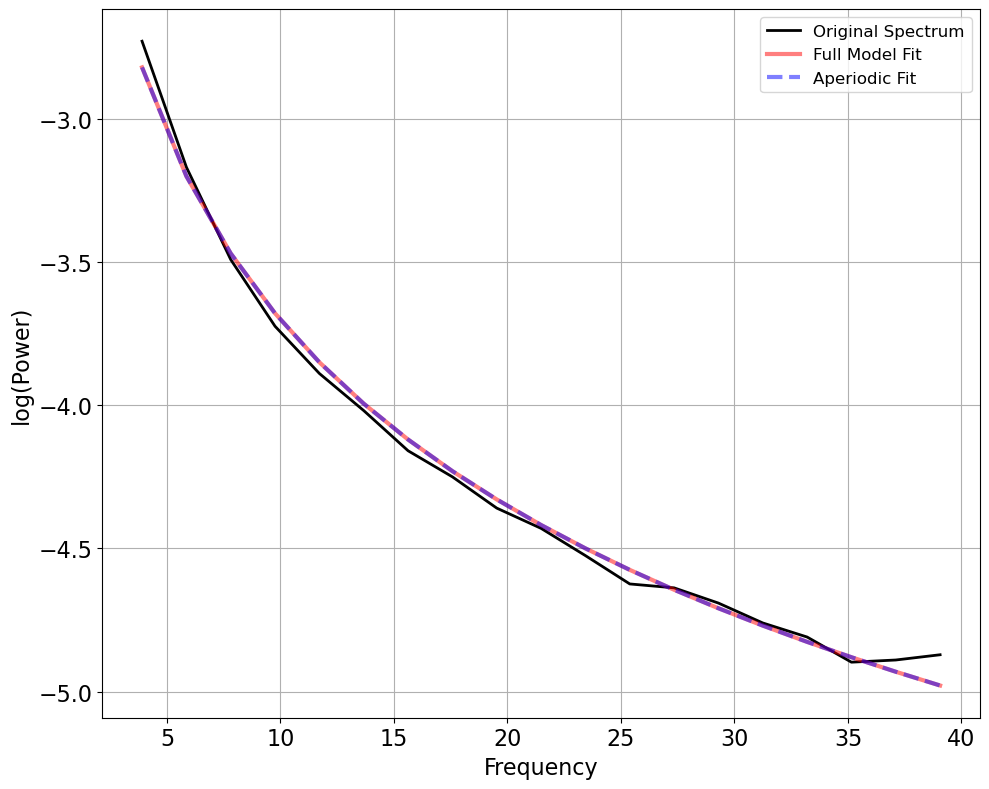

In [71]:
# Set the frequency range to fit the model
freq_range = [2, 40]

# Initialize a FOOOF object
fm = FOOOF(aperiodic_mode='fixed', verbose=False, max_n_peaks=0)


# Fit the model to the data
f_br, Pxx_br = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)


# # Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(f_br, Pxx_br, freq_range)


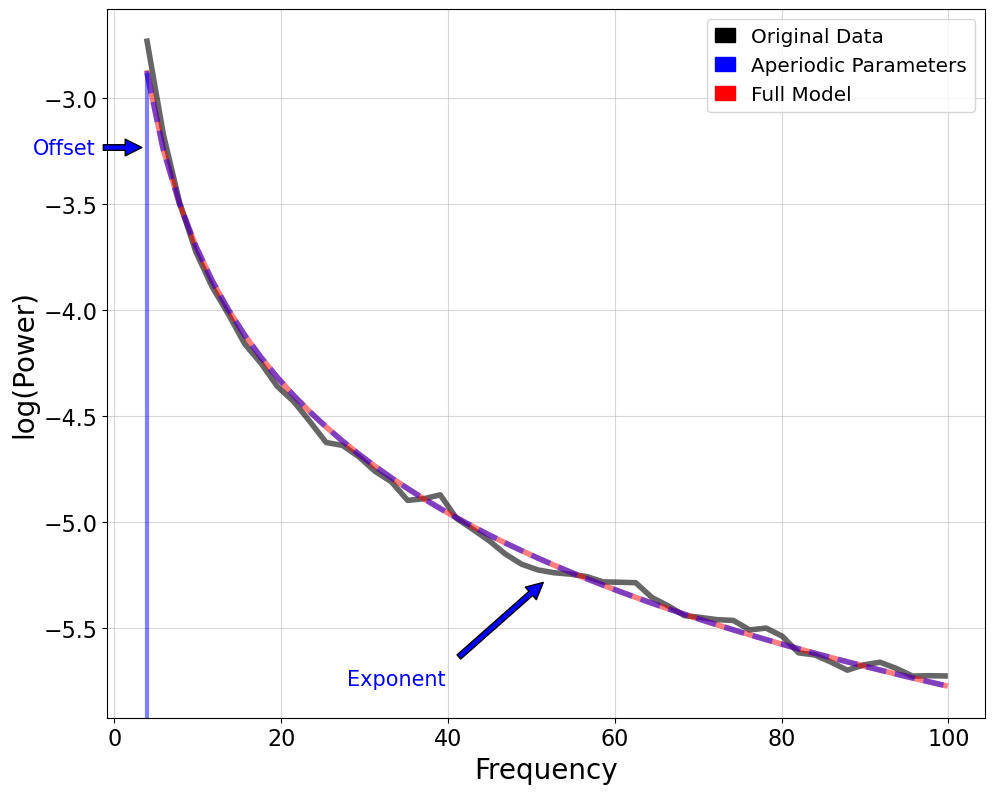

In [61]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm, annotate_peaks=False)

## ECG Sig Poisson_ Real Gauss

Poisson cycle count: 63.0


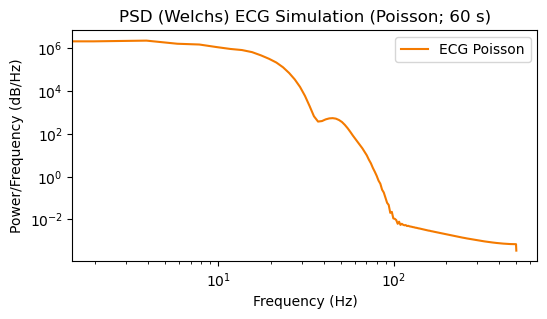

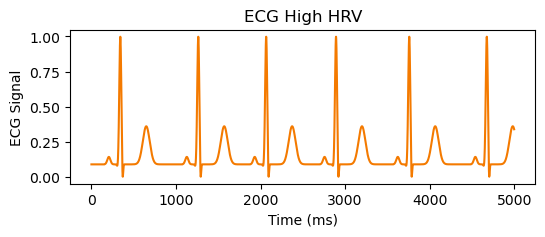

In [75]:
poisson_process, poisson_sig = generate_poisson_signal(time_range = time_range, rate_parameter = rate_parameter, min_spike_interval = min_spike_interval, seed = seed, xs = xs, gaussian_params = gaussian_params)

# Print the spike count
poisson_count = np.sum(poisson_process)
print("Poisson cycle count:", poisson_count)

#PSD WELCH
f_poisson, Pxx_poisson = welch(poisson_sig, fs=1000, nperseg=nperseg, noverlap=noverlap)

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.figure(figsize=(6, 3))
plt.loglog(f_poisson, Pxx_poisson, label = 'ECG Poisson', color = "#f47a00")
plt.title('PSD (Welchs) ECG Simulation (Poisson; 60 s)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## Normalize ECG signal 
poisson_sig_norm = (poisson_sig - np.mean(poisson_sig)) / np.std(poisson_sig)
# Min-Max scaling
ecg_min_max_scaled_poisson = (poisson_sig_norm - np.min(poisson_sig_norm)) / (np.max(poisson_sig_norm) - np.min(poisson_sig_norm))

# Plot the resulting ECG signal
plt.figure(figsize=(6, 2))
plt.plot(ecg_min_max_scaled_poisson[CROP_MIN:CROP_MAX], color = '#f47a00')
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG High HRV')
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.95 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 3 - 100 Hz                        
                                 Frequency Resolution is 1.95 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

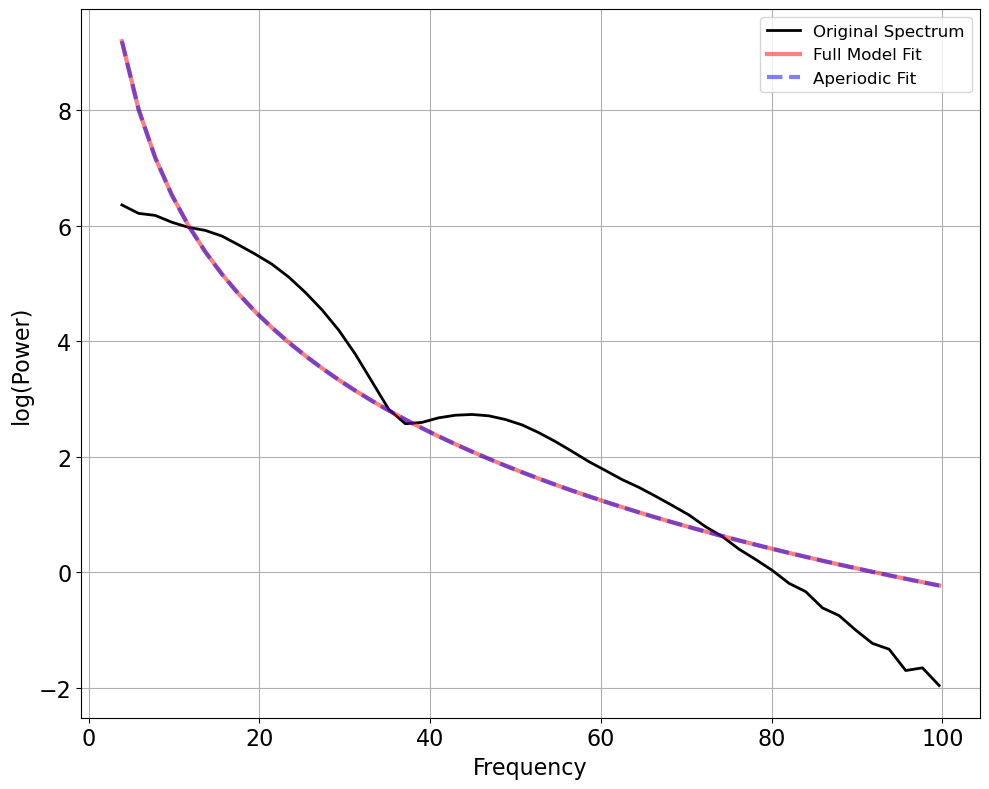

In [81]:
##High HRV: 

# Set the frequency range to fit the model
freq_range = [2, 100]

# Initialize a FOOOF object
fm1 = FOOOF(aperiodic_mode='knee', verbose=True, max_n_peaks=0)


# # Report: fit the model, print the resulting parameters, and plot the reconstruction
fm1.report(f_poisson, Pxx_poisson, freq_range)

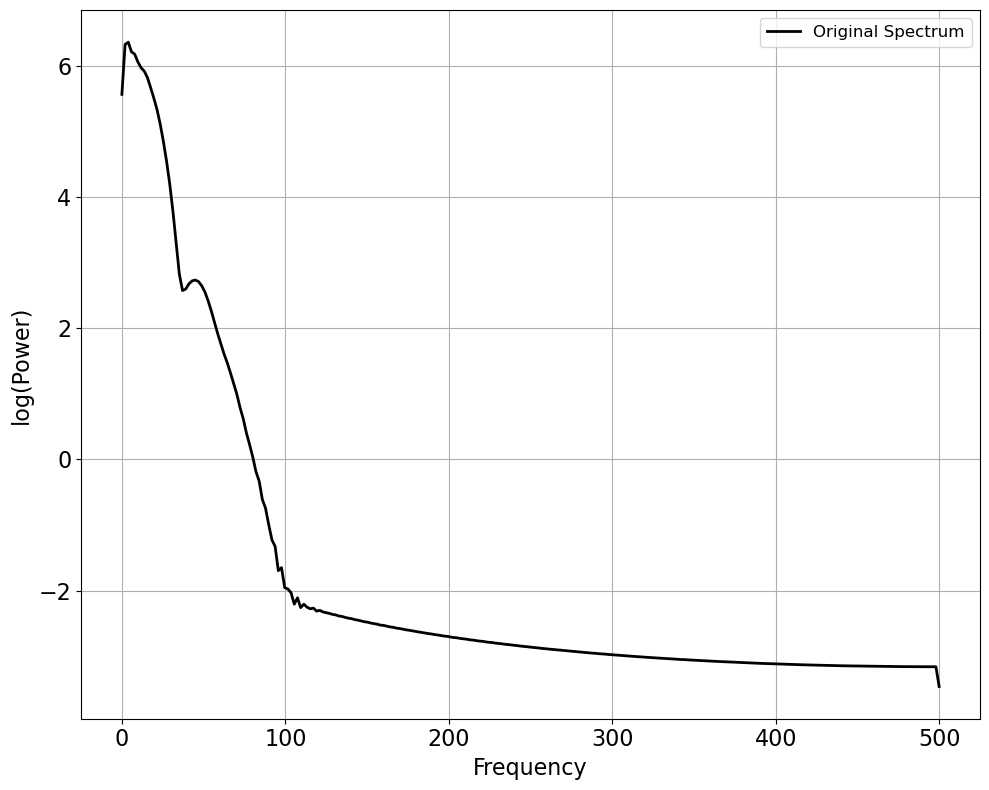

In [65]:
# Plot one of the example power spectra
plot_spectra(f_poisson, Pxx_poisson, log_powers=True,
             color='black', label='Original Spectrum')

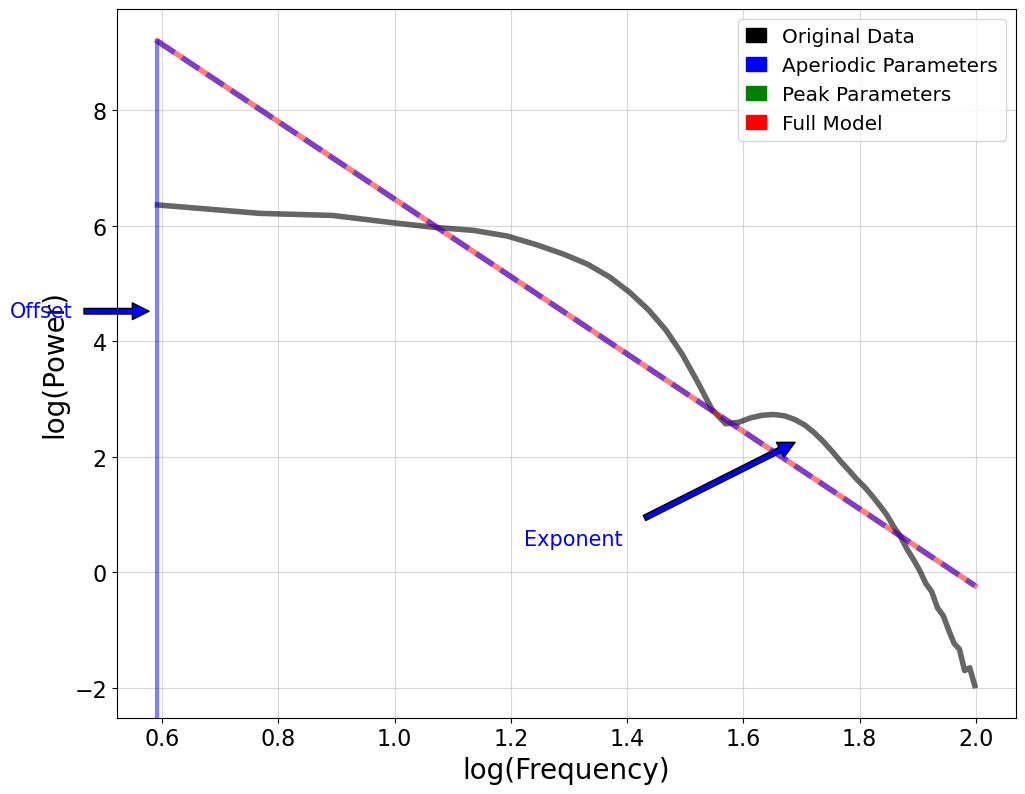

In [66]:
# Plot the power spectrum model, in log-log space
plot_annotated_model(fm, plt_log=True)

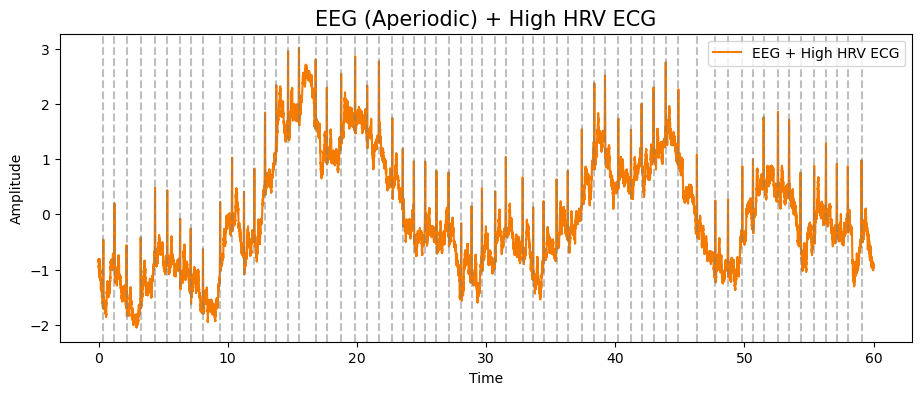

In [37]:
#Combine the EEG and High HRV ECG
# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.4 * max_amplitude_br_noise) / np.max(poisson_sig_norm)

# Scale down the poisson_sig_norm
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_poisson_sig = poisson_sig_norm * scaling_factor

# # Multiply the signals together
# resulting_signal = br_noise * scaled_poisson_sig

# Superimpose the signals by adding them together
resulting_signal_poisson = br_noise + scaled_poisson_sig

# Find the indices of maxima in poisson_sig_norm (cardiac artifact signal)
max_indices = np.where(poisson_sig_norm == np.max(poisson_sig_norm))[0]

# Plot both signals together
plt.figure(figsize=(11, 4))

# Plot EEG signal with cardiac artifacts
plt.plot(times, resulting_signal_poisson, color='#f47a00', label='EEG + High HRV ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG (Aperiodic) + High HRV ECG', fontsize = 15)
plt.legend()
for index in max_indices:
    plt.axvline(x=times[index], color='grey', linestyle='--', alpha = 0.5)
plt.show()



In [38]:
#PSD 
#Wlech
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Calculate the Power Spectral Density (PSD) using Welch's method
#Brown noise aperiodic signal
f_br, Pxx_br = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)

#Resulting signal after adding EEG to ECG
f_poisson, Pxx_poisson = welch(resulting_signal_poisson, fs=1000, nperseg=nperseg, noverlap=noverlap)


# plt.figure(figsize=(6, 3))

# # Plot the Power Spectral Density (PSD) in log-log space for both signals
# plt.loglog(f_poisson, Pxx_poisson, label='EEG + High HRV ECG', color='#f47a00' )
# plt.loglog(f_br, Pxx_br, label='EEG Aperiodic',color='blue')

# plt.title('Power Spectral Density (Welchs Method)')
# plt.xlabel('Frequency (Hz)')
# # plt.grid(True)
# plt.ylabel('Power/Frequency (dB/Hz)')
# plt.legend()
# plt.show()


## ECG Sig Rhythmic_Real Gauss

Rhythmic cycle count: [1. 0. 0. ... 0. 0. 0.]


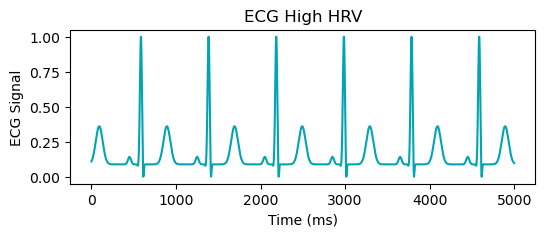

In [39]:
#generate sig
rhythmic_process, rhythmic_sig = generate_rhythmic_signal(time_range = time_range, xs=xs, min_spike_interval=min_spike_interval, gaussian_params=gaussian_params)

# Print the spike count
rhythmic_count = np.sum(rhythmic_process)
print("Rhythmic cycle count:", rhythmic_process)

## Normalize ECG signal 
rhythmic_sig_norm = (rhythmic_sig - np.mean(rhythmic_sig)) / np.std(rhythmic_sig)
# Min-Max scaling
ecg_min_max_scaled_rhythmic = (rhythmic_sig_norm - np.min(rhythmic_sig_norm)) / (np.max(rhythmic_sig_norm) - np.min(rhythmic_sig_norm))

# Plot the resulting ECG signal
plt.figure(figsize=(6, 2))
plt.plot(ecg_min_max_scaled_rhythmic[CROP_MIN:CROP_MAX], color = '#00a4b3')
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG High HRV')
plt.show()

### Plot high and low HRV

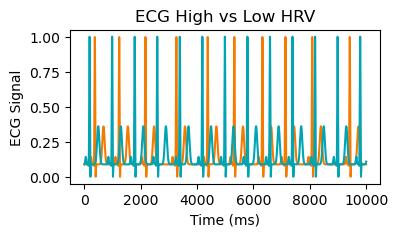

In [91]:
# Plot the resulting ECG signal
plt.figure(figsize=(4, 2))
plt.plot(ecg_min_max_scaled_poisson[0:10000], color = '#f47a00')
plt.plot(ecg_min_max_scaled_rhythmic[0:10000], color = '#00a4b3')

plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG High vs Low HRV')
plt.show()

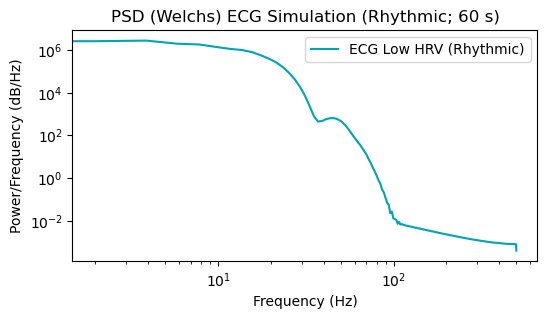

In [40]:
#Welch
f_rhythmic, Pxx_rhythmic = welch(rhythmic_sig, fs=1000, nperseg=nperseg, noverlap=noverlap)

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.figure(figsize=(6, 3))
plt.loglog(f_rhythmic, Pxx_rhythmic, label = 'ECG Low HRV (Rhythmic)', color = "#00a4b3")
plt.title('PSD (Welchs) ECG Simulation (Rhythmic; 60 s)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

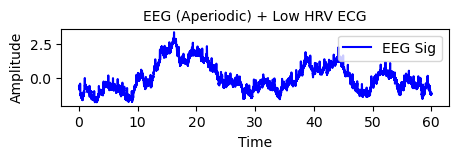

In [86]:
#Put EEG and Low HRV ECG Together

# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.2 * max_amplitude_br_noise) / np.max(rhythmic_sig_norm)

# Scale down the poisson_sig_norm
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_rhythmic_sig = rhythmic_sig_norm * scaling_factor

# # Multiply the signals together
# Superimpose the signals by adding them together
resulting_signal_rhythmic = br_noise + scaled_rhythmic_sig

# Find the indices of maxima in poisson_sig_norm (cardiac artifact signal)
max_indices = np.where(rhythmic_sig_norm == np.max(rhythmic_sig_norm))[0]

plt.figure(figsize=(5, 1))
# Plot EEG signal 
#'#00a4b3'
plt.plot(times, resulting_signal_rhythmic, color='blue', label='EEG Sig')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG (Aperiodic) + Low HRV ECG', fontsize = 10)
plt.legend()
# for index in max_indices:
#     plt.axvline(x=times[index], color='grey', linestyle='--', alpha = 0.5)

plt.show()

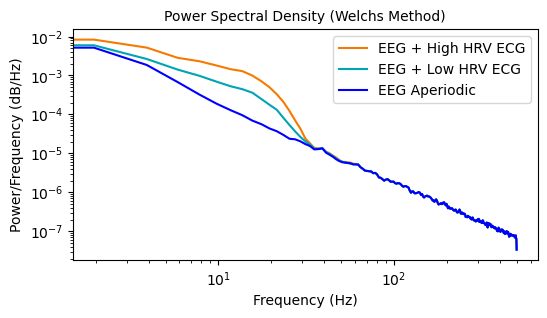

In [42]:
#PSD Wlech

# Calculate the Power Spectral Density (PSD) using Welch's method
f_rhythmic, Pxx_rhythmic = welch(resulting_signal_rhythmic, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(6, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(f_poisson, Pxx_poisson, label='EEG + High HRV ECG', color='#f47a00' )
plt.loglog(f_rhythmic, Pxx_rhythmic, label='EEG + Low HRV ECG', color = '#00a4b3')
plt.loglog(f_br, Pxx_br, label='EEG Aperiodic', color = 'blue')
plt.title('Power Spectral Density (Welchs Method)', fontsize=10)
plt.xlabel('Frequency (Hz)')
# plt.grid(True)
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()



## ECG Sig Rhythmic_R Width

#### Narrow R Peak Sim


Updated parameters:
[ 5.00000000e+01  1.86660441e+03  1.79841848e+01  1.59461650e+02
 -8.16814518e+02  7.71994180e+00  1.85637028e+02  3.18867419e+04
  8.00000000e+00  2.07193654e+02 -5.20392350e+03  6.11511696e+00
  4.92442009e+02  9.51070840e+03  4.08261600e+01]

New width of the R peak: 8


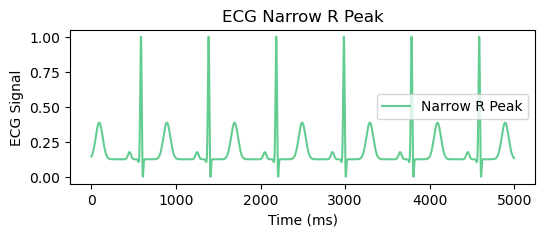

In [16]:
# Define parameters for the narrow peak
peak_index = 2
desired_width_narrow = 8

# Extract the parameters for the specified peak
peak_params = gaussian_params[peak_index*3 : (peak_index+1)*3]
center, height, width = peak_params

# Determine the width change
width_change = desired_width_narrow - width

# Determine the adjustment factor for neighboring peaks
adjustment_factor = width_change / width

# Update the center values of neighboring peaks (Q and S)
if peak_index > 0:
    gaussian_params[(peak_index-1)*3] -= -8
if peak_index < (len(gaussian_params) // 3) - 1:
    gaussian_params[(peak_index+1)*3] += -8

# Update the width of the specified peak
gaussian_params[peak_index*3 + 2] = desired_width_narrow
narr_gaussian_params = gaussian_params

# Print the updated parameters and the new width
print("\nUpdated parameters:")
print(narr_gaussian_params)
print("\nNew width of the R peak:", desired_width_narrow)

#generate sig
rhythmic_process_narr, rhythmic_sig_narr = generate_rhythmic_signal(time_range = time_range, xs=xs, min_spike_interval=min_spike_interval, gaussian_params=narr_gaussian_params)

## Normalize ECG signal 
narr_sig_norm = (rhythmic_sig_narr - np.mean(rhythmic_sig_narr)) / np.std(rhythmic_sig_narr)
# Min-Max scaling
ecg_min_max_scaled_narr = (narr_sig_norm - np.min(narr_sig_norm)) / (np.max(narr_sig_norm) - np.min(narr_sig_norm))

# Plot the ECG signal
plt.figure(figsize=(6, 2))
plt.plot(ecg_min_max_scaled_narr[CROP_MIN:CROP_MAX], color = "#63cc91", label = "Narrow R Peak")
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.legend()
plt.title('ECG Narrow R Peak')
plt.show()

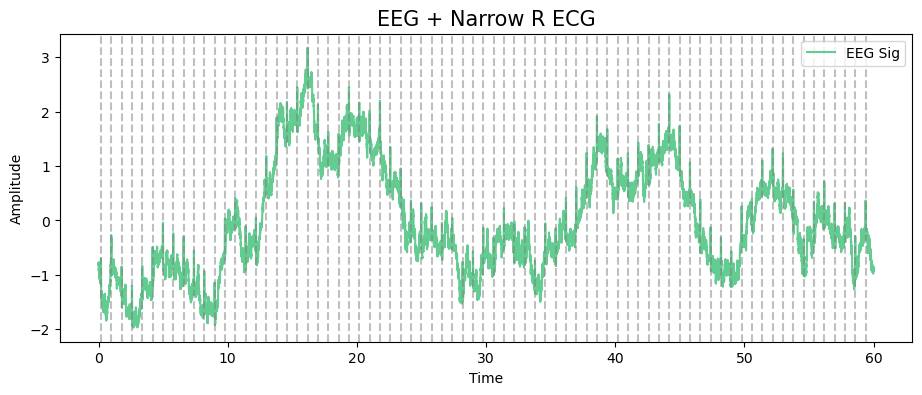

In [17]:

########################
#make signal
# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.2 * max_amplitude_br_noise) / np.max(narr_sig_norm)

# Scale down the poisson_sig_norm
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_narr_sig = narr_sig_norm * scaling_factor

# # Multiply the signals together
# Superimpose the signals by adding them together
resulting_signal_narr = br_noise + scaled_narr_sig

# Find the indices of maxima in signal
max_indices = np.where(scaled_narr_sig == np.max(scaled_narr_sig))[0]

plt.figure(figsize=(11, 4))
plt.plot(times, resulting_signal_narr, color='#63cc91', label='EEG Sig')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG + Narrow R ECG', fontsize = 15)
plt.legend()
for index in max_indices:
    plt.axvline(x=times[index], color='grey', linestyle='--', alpha = 0.5)
plt.show()


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.95 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     -0.1243, 9.5883, 2.7647                                      
                                                                                                  
                                       0 peaks were found:                                        
          

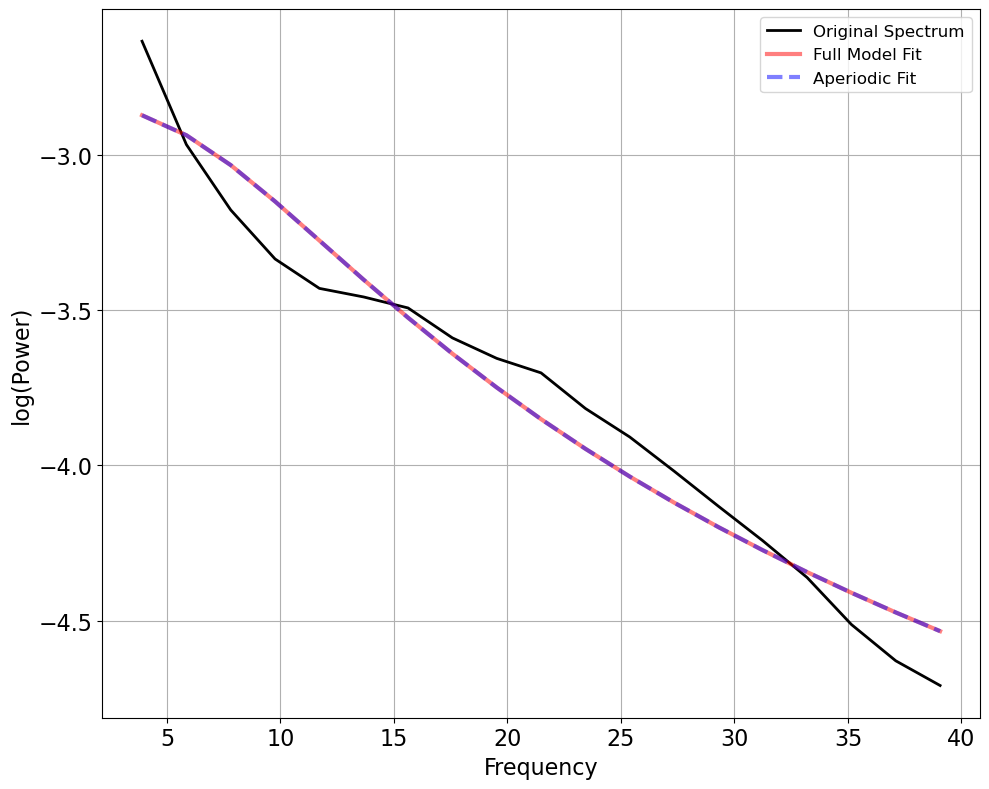

In [88]:
# Calculate the Power Spectral Density (PSD) using Welch's method
f_narr, Pxx_narr = welch(resulting_signal_narr, fs=1000, nperseg=nperseg, noverlap=noverlap)

# Set the frequency range to fit the model
freq_range = [2, 40]

# Initialize a FOOOF object
fm = FOOOF(aperiodic_mode='knee', verbose=False, max_n_peaks=0)



# Fit the model to the data

# # Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(f_narr, Pxx_narr, freq_range)


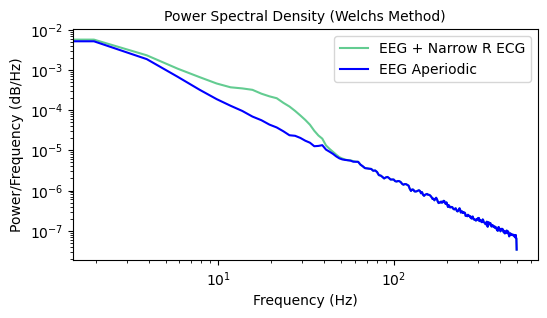

In [18]:

#PSD Wlech

# Calculate the Power Spectral Density (PSD) using Welch's method
f_narr, Pxx_narr = welch(resulting_signal_narr, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(6, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(f_narr, Pxx_narr, label='EEG + Narrow R ECG', color = "#63cc91")
plt.loglog(f_br, Pxx_br, label='EEG Aperiodic', color = 'blue')

plt.title('Power Spectral Density (Welchs Method)', fontsize=10)
plt.xlabel('Frequency (Hz)')
# plt.grid(True)
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

#### Wide


Updated parameters:
[ 5.00000000e+01  1.86660441e+03  1.79841848e+01  1.54461650e+02
 -8.16814518e+02  7.71994180e+00  1.85637028e+02  3.18867419e+04
  1.20000000e+01  2.12193654e+02 -5.20392350e+03  6.11511696e+00
  4.92442009e+02  9.51070840e+03  4.08261600e+01]

New width of the R peak: 12


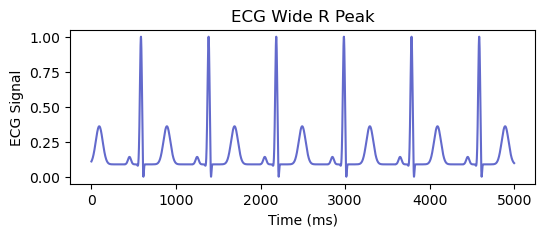

In [19]:
# Define parameters for the wide peak
peak_index = 2
desired_width_wide = 12

# Extract the parameters for the specified peak
peak_params = gaussian_params[peak_index*3 : (peak_index+1)*3]
center, height, width = peak_params

# Determine the width change
width_change = desired_width_wide - width

# Determine the adjustment factor for neighboring peaks
adjustment_factor = width_change / width

# Update the center values of neighboring peaks (Q and S)
if peak_index > 0:
    gaussian_params[(peak_index-1)*3] -= 5
if peak_index < (len(gaussian_params) // 3) - 1:
    gaussian_params[(peak_index+1)*3] += 5

# Update the width of the specified peak
gaussian_params[peak_index*3 + 2] = desired_width_wide
wide_gaussian_params = gaussian_params

# Print the updated parameters and the new width
print("\nUpdated parameters:")
print(gaussian_params)
print("\nNew width of the R peak:", desired_width_wide)

#generate sig
rhythmic_process_wide, rhythmic_sig_wide = generate_rhythmic_signal(time_range = time_range, xs=xs, min_spike_interval=min_spike_interval, gaussian_params=narr_gaussian_params)

## Normalize ECG signal 
wide_sig_norm = (rhythmic_sig_wide - np.mean(rhythmic_sig_wide)) / np.std(rhythmic_sig_wide)
# Min-Max scaling; putting all ecg cycles on 0-1 scale
ecg_min_max_scaled_wide = (wide_sig_norm - np.min(wide_sig_norm)) / (np.max(wide_sig_norm) - np.min(wide_sig_norm))

# Plot the resulting ECG signal
plt.figure(figsize=(6, 2))
plt.plot(ecg_min_max_scaled_wide[CROP_MIN:CROP_MAX], color = "#636ACC", label = 'Wide R Peak')
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG Wide R Peak')
plt.show()



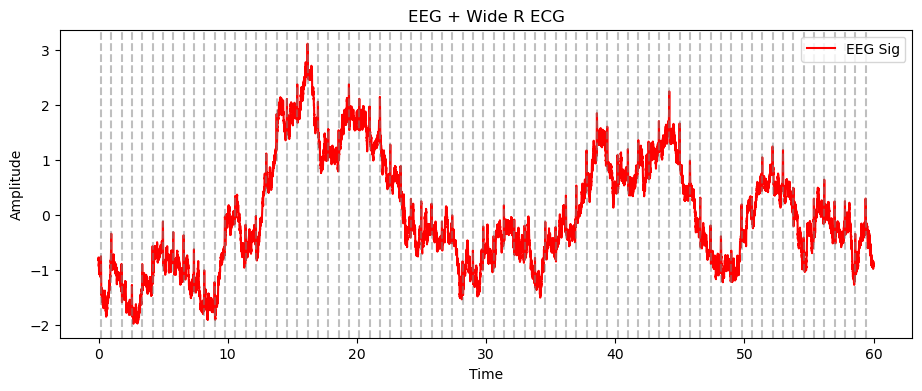

In [24]:

########################
#Plot EEG and ECG together
# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.2 * max_amplitude_br_noise) / np.max(narr_sig_norm)

# Scale down the poisson_sig_norm
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_wide_sig = wide_sig_norm * scaling_factor

# # Multiply the signals together
# Superimpose the signals by adding them together
resulting_signal_wide = br_noise + scaled_wide_sig

# Find the indices of maxima in poisson_sig_norm 
max_indices = np.where(wide_sig_norm == np.max(wide_sig_norm))[0]

plt.figure(figsize=(11, 4))
#color: #636ACC
plt.plot(times, resulting_signal_wide, color='red', label='EEG Sig')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG + Wide R ECG')
plt.legend()
for index in max_indices:
    plt.axvline(x=times[index], color='grey', linestyle='--', alpha = 0.5)
plt.show()

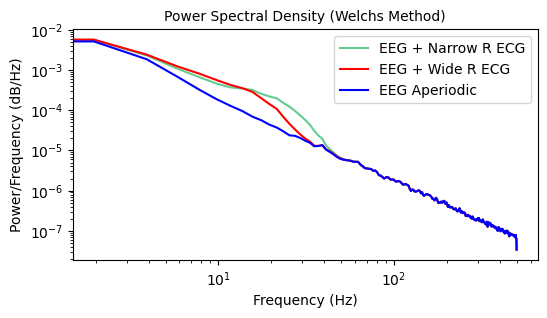

In [23]:

#PSD Wlech
# Calculate the Power Spectral Density (PSD) using Welch's method
f_wide, Pxx_wide = welch(resulting_signal_wide, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(6, 3))
# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(f_narr, Pxx_narr, label='EEG + Narrow R ECG', color = "#63cc91")
plt.loglog(f_wide, Pxx_wide, label='EEG + Wide R ECG', color = "red")
plt.loglog(f_br, Pxx_br, label='EEG Aperiodic', color = 'blue')
plt.title('Power Spectral Density (Welchs Method)', fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()



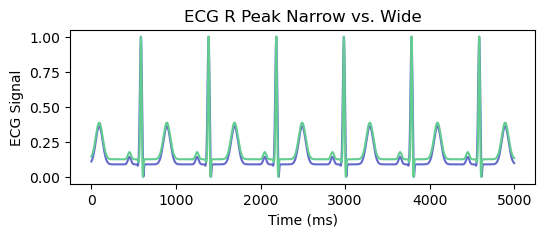

In [22]:
# Plot the resulting ECG signal
plt.figure(figsize=(6, 2))
plt.plot(ecg_min_max_scaled_wide[CROP_MIN:CROP_MAX], color = "#636ACC", label = 'Wide R Peak')
plt.plot(ecg_min_max_scaled_narr[CROP_MIN:CROP_MAX], color = "#63cc91", label = 'Narrow R Peak')
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG R Peak Narrow vs. Wide')
plt.show()

